In [31]:
import pandas as pd


In [23]:
df=pd.read_csv("F:\dataset\ipl\ipl.csv")

In [24]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [25]:
columns_to_remove=['mid','venue' ,'batsman','bowler','striker','non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [7]:
df.head()

,mid,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [8]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
consistent_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians','Kings XI Punjab',
                 'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad' ]

In [26]:
df1=df[(df['bat_team'].isin(consistent_team))&(df['bowl_team'].isin(consistent_team))]

In [27]:
df2=df[df['overs']>=5.0]

In [28]:
df2.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [35]:
from datetime import datetime
df['date']=df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [36]:
encoded_df=pd.get_dummies(data=df, columns=['bat_team','bowl_team'])

In [38]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,...,bowl_team_Kings XI Punjab,bowl_team_Kochi Tuskers Kerala,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Rising Pune Supergiant,bowl_team_Rising Pune Supergiants,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,1,0,0.1,1,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2008-04-18,1,0,0.2,1,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2008-04-18,2,0,0.2,2,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2008-04-18,2,0,0.3,2,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2008-04-18,2,0,0.4,2,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Deccan Chargers',
       'bat_team_Delhi Daredevils', 'bat_team_Gujarat Lions',
       'bat_team_Kings XI Punjab', 'bat_team_Kochi Tuskers Kerala',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Pune Warriors', 'bat_team_Rajasthan Royals',
       'bat_team_Rising Pune Supergiant', 'bat_team_Rising Pune Supergiants',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Deccan Chargers',
       'bowl_team_Delhi Daredevils', 'bowl_team_Gujarat Lions',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kochi Tuskers Kerala',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Pune Warriors', 'bowl_team_Rajasthan Royals',
       'bowl_team_Rising Pune Supergiant', 'bowl_team_Rising Pune Supergiants',
       'bowl_t

In [42]:
encoded_df=encoded_df[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
        'bat_team_Chennai Super Kings', 'bat_team_Deccan Chargers',
       'bat_team_Delhi Daredevils', 'bat_team_Gujarat Lions',
       'bat_team_Kings XI Punjab', 'bat_team_Kochi Tuskers Kerala',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Pune Warriors', 'bat_team_Rajasthan Royals',
       'bat_team_Rising Pune Supergiant', 'bat_team_Rising Pune Supergiants',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Deccan Chargers',
       'bowl_team_Delhi Daredevils', 'bowl_team_Gujarat Lions',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kochi Tuskers Kerala',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Pune Warriors', 'bowl_team_Rajasthan Royals',
       'bowl_team_Rising Pune Supergiant', 'bowl_team_Rising Pune Supergiants',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','total']]

In [43]:
##for timeseries kind of data we split like that and dt is datetime
X_train=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
X_test=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>=2017]

In [46]:
y_train=encoded_df[encoded_df['date'].dt.year<=2016]['total'].values
y_test=encoded_df[encoded_df['date'].dt.year>=2017]['total'].values

In [47]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [48]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
#now try another model
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [50]:
##cv is cross validation
##grid serch cv is basically a hyper parameter tuning technique
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\sunil kumar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.51047e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunil kumar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.3811e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunil kumar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.56232e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunil kumar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.33845e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunil kumar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.5273e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\sunil kumar\anaconda3\l

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [51]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-430.6546825027482


In [56]:
predictions=ridge_regressor.predict(X_test)


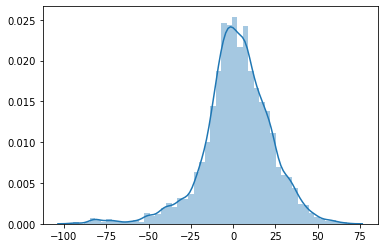

In [57]:
import seaborn as sns
sns.distplot(y_test-predictions)

In [59]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test, predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 14.950121507809056
MSE: 407.453163512876
RMSE: 20.185469117978805


In [ ]:
##lasso regression is also somewhate same in applying